In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sparsetools as sp
from matplotlib.colors import LogNorm
from scipy.ndimage import median_filter
plt.rcParams['figure.dpi'] = 120

In [2]:
obs = sp.profile('../../ibis_alma3_obs.nc').extractPix(x1=320,y1=320)
fit_nlte = sp.profile('../band3/nlte/ibis_alma3_noalma_fit.nc').extractPix(x1=320,y1=320)
mod_nlte = sp.model('../band3/nlte/ibis_alma3_noalma_mod.nc').extract(x1=320,y1=320)
fit_alma = sp.profile('../band3/alma/alma_fit_2_redux.nc').extractPix(x1=320,y1=320)
mod_alma = sp.model('../band3/alma/alma_mod_2_redux.nc').extract(x1=320,y1=320)

profile::setsize: nx=334, ny=334, nw=208, ns=4, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=320, ny=320, nw=208, ns=4, nt=1
profile::setsize: nx=334, ny=334, nw=208, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=320, ny=320, nw=208, ns=4, nt=1
model::read: atmos type -> depth-stratified
model::read: nx=334, ny=334, ndep=61, nt=1
model::setSize: nx = 334, ny = 334, ndep = 61, nt = 1
model::extract: x=(0,320), y=(0,320), z=(0,61), t=(0,1)
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1
profile::setsize: nx=320, ny=320, nw=208, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=320, ny=320, nw=208, ns=4, nt=1
model::read: atmos type -> depth-stratified
model::read: nx=320, ny=320, ndep=61, nt=1
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1
model::extract: x=(0,320), y=(0,320), z=(0,61), t=(0,1)
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1


In [3]:
x0,y0 = -87.0, 237.3
w = 0.096*320
x1,y1 = x0+w,y0+w

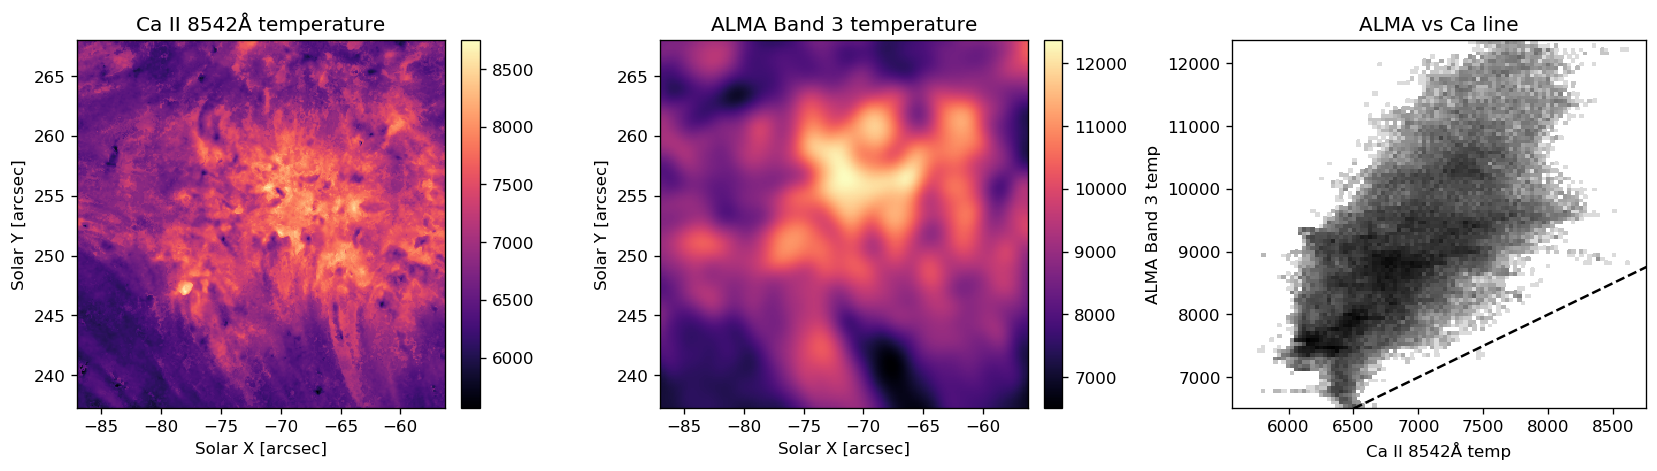

In [4]:
plt.figure(figsize=(14,4))
im_ca = mod_nlte.temp[0,:,:,13]
im_alma = obs.dat[0,:,:,-1,0]*7300
plt.subplot(131)
plt.imshow(im_ca,extent=[x0,x1,y0,y1],cmap='magma',origin='lower')
plt.xlabel('Solar X [arcsec]')
plt.ylabel('Solar Y [arcsec]')
plt.title('Ca II 8542Å temperature')
plt.colorbar(fraction=0.046,pad=0.04)
plt.subplot(132)
plt.imshow(im_alma,extent=[x0,x1,y0,y1],cmap='magma',origin='lower')
plt.xlabel('Solar X [arcsec]')
plt.ylabel('Solar Y [arcsec]')
plt.title('ALMA Band 3 temperature')
plt.colorbar(fraction=0.046,pad=0.04)
plt.subplot(133)
plt.hist2d(im_ca.ravel(),im_alma.ravel(),bins=[100,100],cmap='gist_yarg',norm=LogNorm())
plt.plot([4000,10000],[4000,10000],'--k')
plt.xlabel('Ca II 8542Å temp')
plt.ylabel('ALMA Band 3 temp')
plt.title('ALMA vs Ca line')
plt.tight_layout()
plt.savefig('ca_vs_band3.pdf')

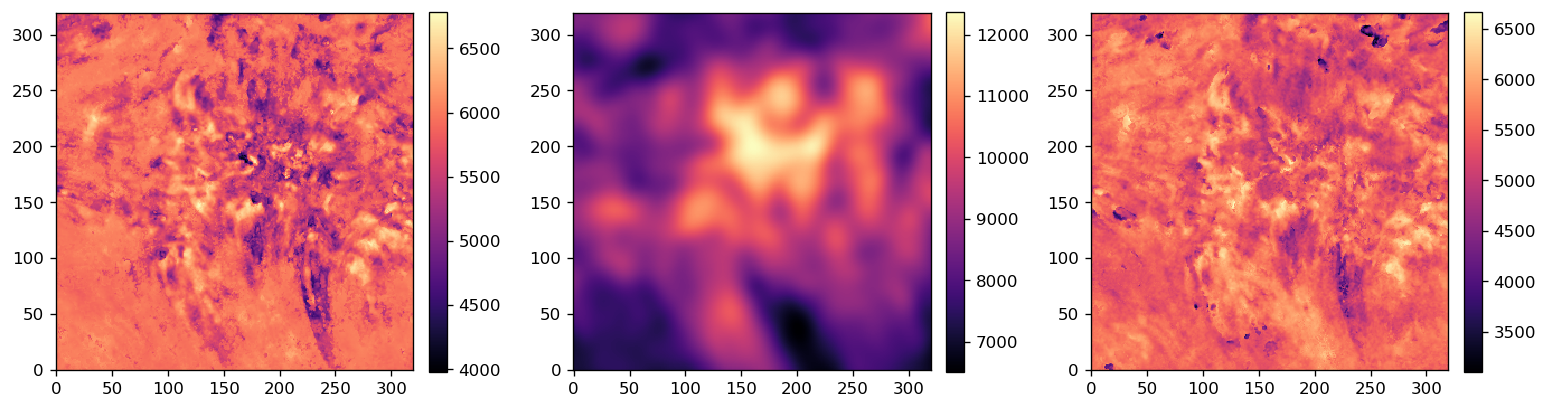

In [5]:
fig,ax = plt.subplots(1,3,figsize=(13,4))
im_obs = ax[1].imshow(obs.dat[0,:,:,-1,0]*7300,cmap='magma',origin='lower')#,vmin=4000,vmax=9000)
im_nlte = ax[0].imshow(mod_nlte.temp[0,:,:,20],cmap='magma',origin='lower')#,vmin=5000,vmax=9000)
im_alma = ax[2].imshow(mod_alma.temp[0,:,:,20],cmap='magma',origin='lower')#,vmin=5000,vmax=9000)
plt.colorbar(im_obs,ax=ax[1],fraction=0.046,pad=0.04)
plt.colorbar(im_nlte,ax=ax[0],fraction=0.046,pad=0.04)
plt.colorbar(im_alma,ax=ax[2],fraction=0.046,pad=0.04)
plt.tight_layout()

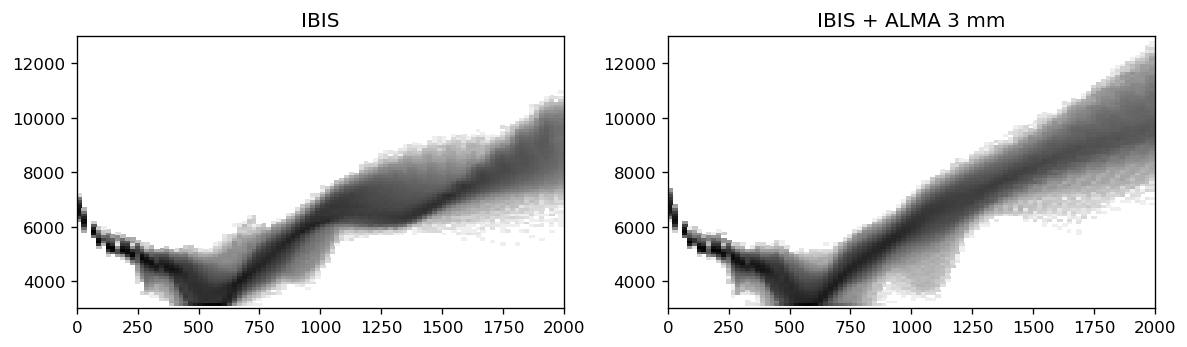

In [6]:
plt.figure(figsize=(10,3))
z_nlte = (mod_nlte.z.T - mod_nlte.z.T[58]).T/1e5
z_alma = (mod_alma.z.T - mod_alma.z.T[58]).T/1e5
plt.subplot(121)
plt.hist2d(z_nlte.ravel(),mod_nlte.temp.ravel(),bins=[np.linspace(0,2000,101),np.linspace(3000,13000,101)],\
           norm=LogNorm(),cmap='gist_yarg')
plt.title('IBIS')
plt.subplot(122)
plt.hist2d(z_alma.ravel(),mod_alma.temp.ravel(),bins=[np.linspace(0,2000,101),np.linspace(3000,13000,101)],\
           norm=LogNorm(),cmap='gist_yarg')
plt.title('IBIS + ALMA 3 mm')
plt.tight_layout()

(3000, 12000)

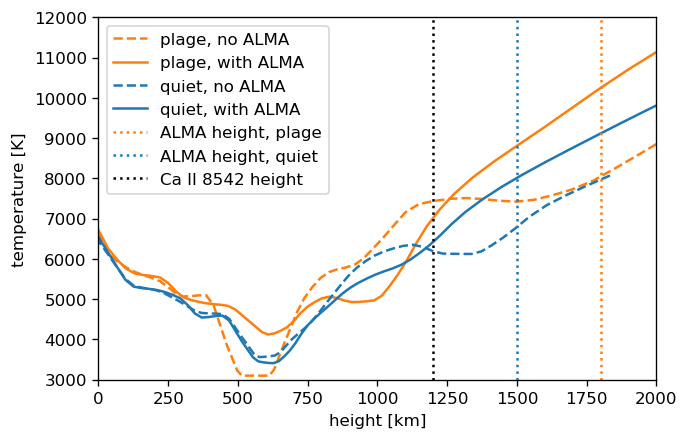

In [7]:
plt.figure(figsize=(6,4),facecolor='w')
plt.plot(z_nlte[0,200,200],mod_nlte.temp[0,200,200],linestyle='--',color='C1',label='plage, no ALMA')
plt.plot(z_alma[0,200,200],mod_alma.temp[0,200,200],linestyle='-',color='C1',label='plage, with ALMA')
plt.plot(z_nlte[0,50,50],mod_nlte.temp[0,50,50],linestyle='--',color='C0',label='quiet, no ALMA')
plt.plot(z_alma[0,50,50],mod_alma.temp[0,50,50],linestyle='-',color='C0',label='quiet, with ALMA')
plt.axvline(1800,color='C1',linestyle=':',label='ALMA height, plage')
plt.axvline(1500,color='C0',linestyle=':',label='ALMA height, quiet')
plt.axvline(1200,color='k',linestyle=':',label='Ca II 8542 height')
plt.legend()
plt.xlabel('height [km]')
plt.ylabel('temperature [K]')
plt.xlim(0,2000)
plt.ylim(3000,12000)

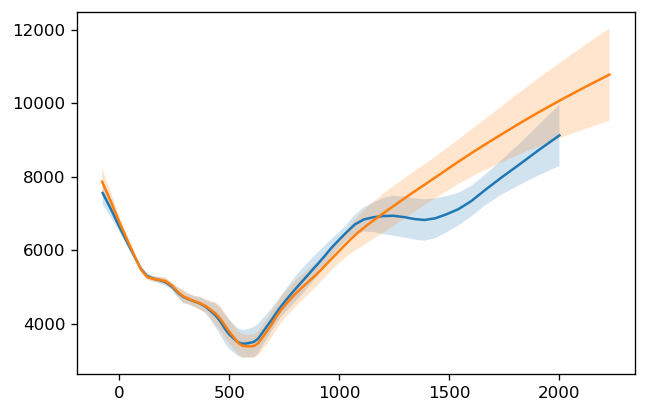

In [8]:
x_nlte = np.mean(z_nlte[0],(0,1))
#x_nlte = np.mean(mod_nlte.cmass[0],(0,1))
y_nlte = np.mean(mod_nlte.temp[0],(0,1))
yerr_nlte = np.std(mod_nlte.temp[0],(0,1))
x_alma = np.mean(z_alma[0],(0,1))
#x_alma = np.mean(mod_alma.cmass[0],(0,1))
y_alma = np.mean(mod_alma.temp[0],(0,1))
yerr_alma = np.std(mod_alma.temp[0],(0,1))
plt.plot(x_nlte,y_nlte)
plt.fill_between(x_nlte,y_nlte-yerr_nlte,y_nlte+yerr_nlte,alpha=0.2)
plt.plot(x_alma,y_alma)
plt.fill_between(x_alma,y_alma-yerr_alma,y_alma+yerr_alma,alpha=0.2)

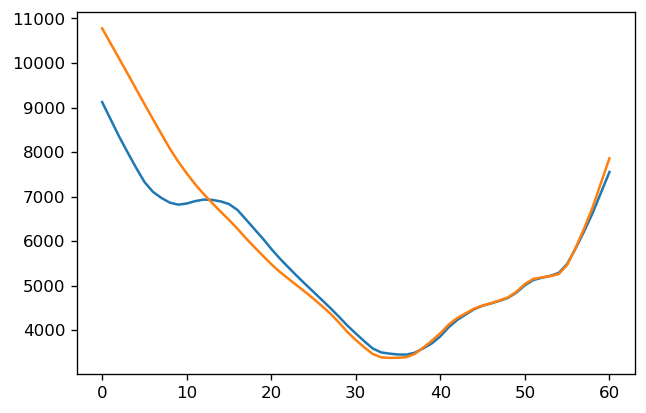

In [9]:
plt.plot(np.mean(mod_nlte.temp[0],(0,1)))
plt.plot(np.mean(mod_alma.temp[0],(0,1)))

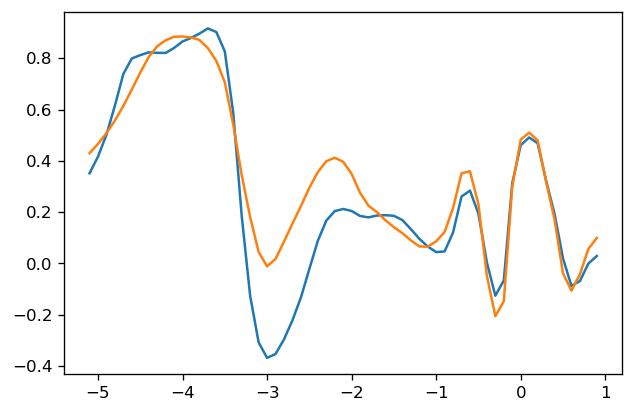

In [10]:
cor_nlte = np.zeros(61)
cor_alma = np.zeros(61)
for i in range(61):
    cor_nlte[i] = np.corrcoef(np.min(obs.dat[0,:,:,:75,0],axis=2).ravel(),mod_nlte.temp[0,:,:,i].ravel())[0,1]
    cor_alma[i] = np.corrcoef(np.min(obs.dat[0,:,:,:75,0],axis=2).ravel(),mod_alma.temp[0,:,:,i].ravel())[0,1]
plt.plot(np.arange(61)*0.1-5.1,cor_nlte)
plt.plot(np.arange(61)*0.1-5.1,cor_alma)

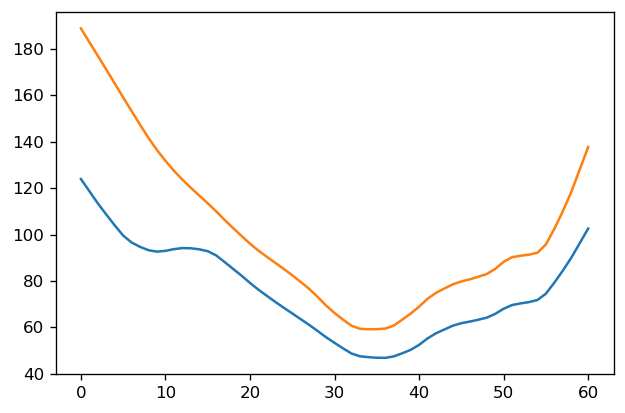

In [11]:
im_nlte = mod_nlte.temp[0]
im_alma = mod_alma.temp[0]
med_nlte = median_filter(mod_nlte.temp[0],(3,3,1))
med_alma = median_filter(mod_alma.temp[0],(3,3,1))
dif_nlte = im_nlte - med_nlte
dif_alma = im_alma - med_alma
rms_nlte = np.sqrt(np.mean(dif_nlte**2))
rms_alma = np.sqrt(np.mean(dif_alma**2))
snr_nlte = np.mean(im_nlte,(0,1)) / rms_nlte
snr_alma = np.mean(im_alma,(0,1)) / rms_alma
plt.plot(snr_nlte)
plt.plot(snr_alma)

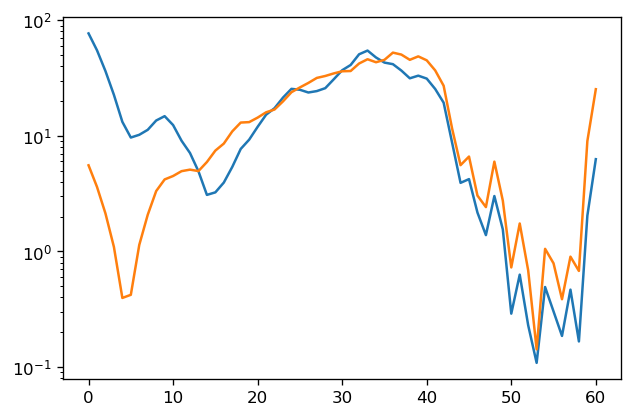

In [12]:
im_nlte = mod_nlte.temp[0]
med_nlte = median_filter(im_nlte,(3,3,1))
r_nlte = im_nlte / med_nlte
s_nlte = np.sum((r_nlte-1)**2,(0,1))
plt.plot(s_nlte)
im_alma = mod_alma.temp[0]
med_alma = median_filter(im_alma,(3,3,1))
r_alma = im_alma / med_alma
s_alma = np.sum((r_alma-1)**2,(0,1))
plt.plot(s_alma)
plt.yscale('log')

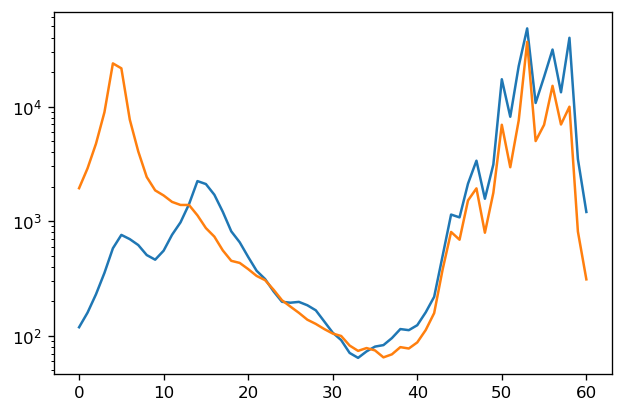

In [13]:
plt.plot(np.mean(im_nlte,(0,1))/s_nlte)
plt.plot(np.mean(im_alma,(0,1))/s_alma)
plt.yscale('log')

(array([  91.,   94.,  106.,  141.,  279.,  223.,  197.,  203.,  239.,
         240.,  351.,  371.,  437.,  505.,  957., 1283., 1703., 1331.,
        1608., 1438., 1491., 1554., 1540., 1533., 1720., 1534., 1491.,
        1457., 1547., 1563., 1502., 1604., 1708., 1828., 1767., 1984.,
        2053., 2045., 2276., 2465., 2402., 2468., 2512., 2259., 2056.,
        2075., 2120., 1983., 1933., 1939., 1969., 1962., 1789., 1600.,
        1351., 1258., 1151., 1001.,  963., 1008., 1037., 1053., 1138.,
        1176., 1091.,  903.,  836.,  785.,  789.,  777.,  697.,  610.,
         553.,  556.,  535.,  529.,  500.,  491.,  402.,  410.,  421.,
         410.,  386.,  378.,  304.,  287.,  290.,  273.,  283.,  287.,
         245.,  261.,  294.,  241.,  216.,  197.,  170.,  138.,  101.,
          92.]),
 array([ 6515.53417969,  6574.10915039,  6632.68412109,  6691.2590918 ,
         6749.8340625 ,  6808.4090332 ,  6866.98400391,  6925.55897461,
         6984.13394531,  7042.70891602,  7101.28388672,  7

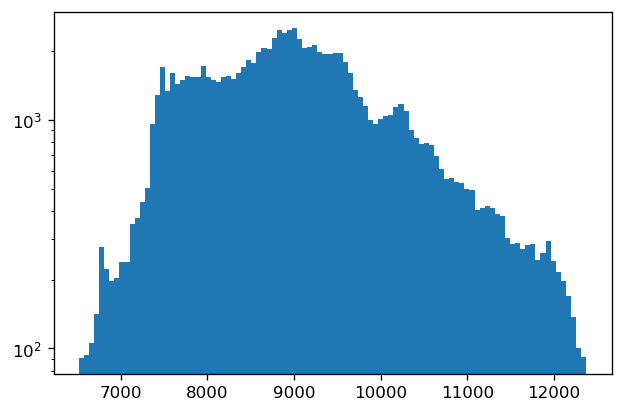

In [14]:
plt.hist(obs.dat[0,:,:,-1,0].ravel()*7300,bins=100,log=True)

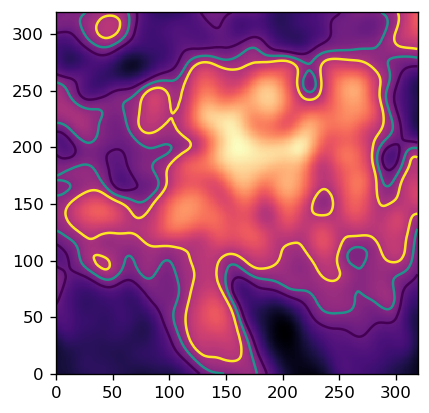

In [15]:
thres = 8800
buffer = 500
plt.imshow(obs.dat[0,:,:,-1,0]*7300,cmap='magma',origin='lower')
plt.contour(obs.dat[0,:,:,-1,0]*7300,[thres-buffer,thres,thres+buffer])

In [16]:
warm = np.where(obs.dat[0,:,:,-1,0].ravel()*7300>thres+buffer)[0]
cool = np.where(obs.dat[0,:,:,-1,0].ravel()*7300<thres-buffer)[0]
print(len(warm),len(cool))

39002 27913


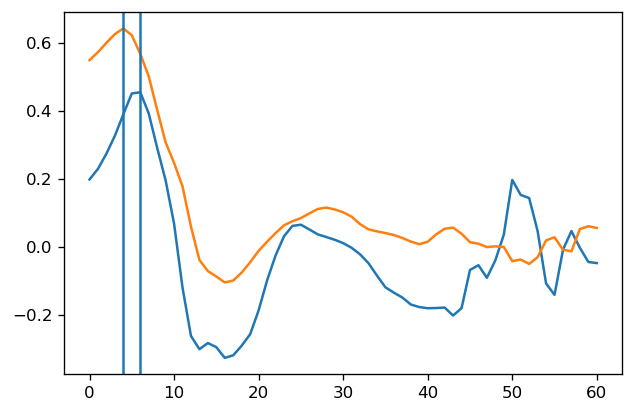

In [17]:
cor_warm = np.zeros(61)
cor_cool = np.zeros(61)
for i in range(61):
    cor_warm[i] = np.corrcoef(obs.dat[0,:,:,-1,0].ravel()[warm],\
                              (mod_alma.temp/mod_nlte.temp)[0,:,:,i].ravel()[warm])[0,1]
    cor_cool[i] = np.corrcoef(obs.dat[0,:,:,-1,0].ravel()[cool],\
                              (mod_alma.temp/mod_nlte.temp)[0,:,:,i].ravel()[cool])[0,1]
plt.plot(cor_cool)
plt.plot(cor_warm)
max_c = np.argmax(cor_cool)
max_w = np.argmax(cor_warm)
plt.axvline(max_c)
plt.axvline(max_w)

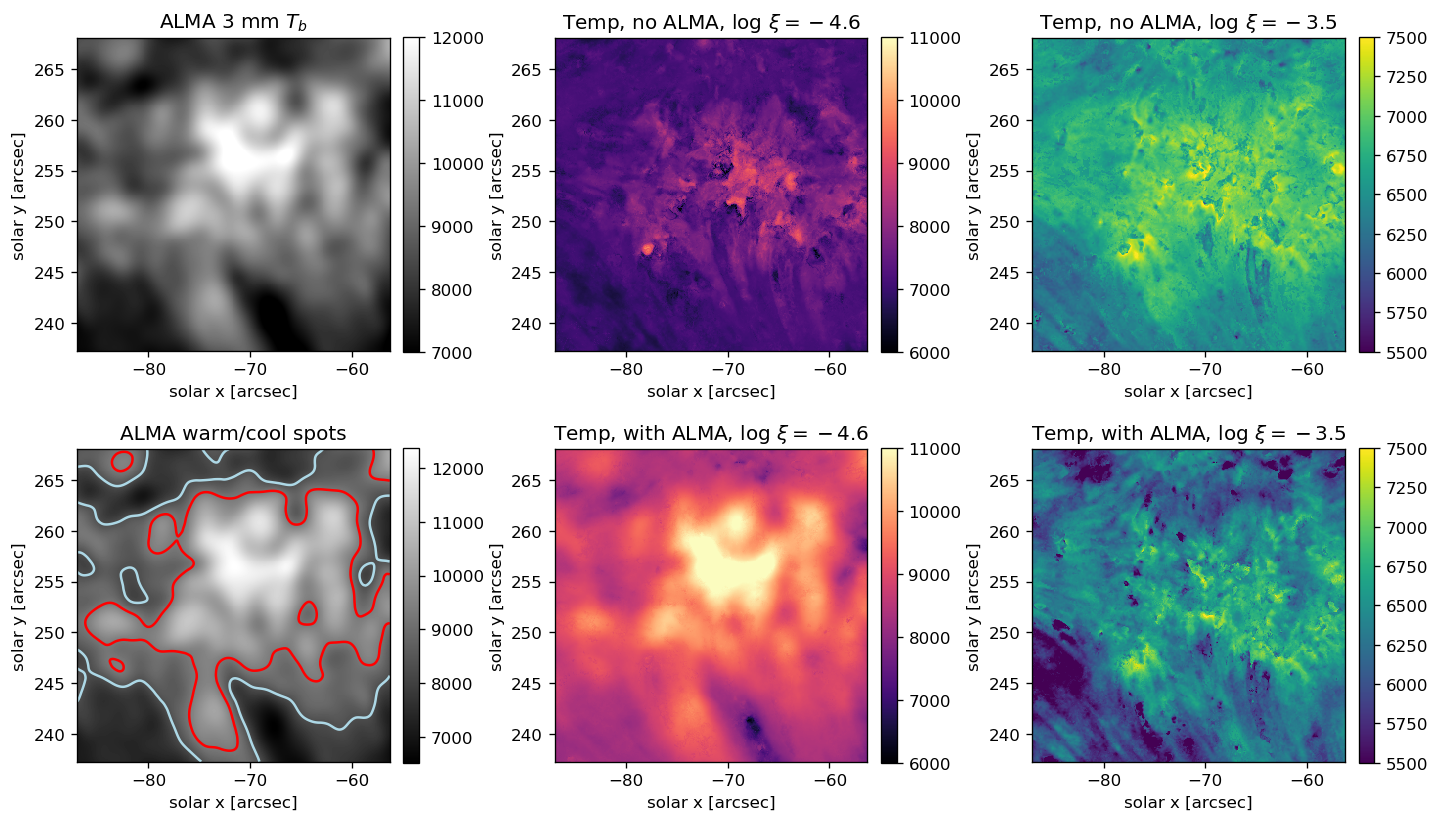

In [18]:
fig,ax = plt.subplots(2,3,figsize=(12,7),facecolor='w')
dim = 320*0.096
im00 = ax[0,0].imshow(obs.dat[0,:,:,-1,0]*7300,extent=[x0,x1,y0,y1],\
               cmap='gist_gray',origin='lower',vmin=7000,vmax=12000)
im10 = ax[1,0].imshow(obs.dat[0,:,:,-1,0]*7300,extent=[x0,x1,y0,y1],\
               cmap='gist_gray',origin='lower')
ax[1,0].contour(obs.dat[0,:,:,-1,0]*7300,[thres-buffer,thres+buffer],\
                extent=[x0,x1,y0,y1],colors=['lightblue','red'])
im01 = ax[0,1].imshow(mod_nlte.temp[0,:,:,5],extent=[x0,x1,y0,y1],\
               cmap='magma',origin='lower',vmin=6000,vmax=11000)
im11 = ax[1,1].imshow(mod_alma.temp[0,:,:,5],extent=[x0,x1,y0,y1],\
               cmap='magma',origin='lower',vmin=6000,vmax=11000)
im02 = ax[0,2].imshow(mod_nlte.temp[0,:,:,16],extent=[x0,x1,y0,y1],\
               cmap='viridis',origin='lower',vmin=5500,vmax=7500)
im12 = ax[1,2].imshow(mod_alma.temp[0,:,:,16],extent=[x0,x1,y0,y1],\
               cmap='viridis',origin='lower',vmin=5500,vmax=7500)
plt.colorbar(im00,ax=ax[0,0],fraction=0.046,pad=0.04)
plt.colorbar(im10,ax=ax[1,0],fraction=0.046,pad=0.04)
plt.colorbar(im01,ax=ax[0,1],fraction=0.046,pad=0.04)
plt.colorbar(im11,ax=ax[1,1],fraction=0.046,pad=0.04)
plt.colorbar(im02,ax=ax[0,2],fraction=0.046,pad=0.04)
plt.colorbar(im12,ax=ax[1,2],fraction=0.046,pad=0.04)
for i in range(2):
    for j in range(3):
        ax[i,j].set_xlabel('solar x [arcsec]')
        ax[i,j].set_ylabel('solar y [arcsec]')
ax[0,0].set_title(r'ALMA 3 mm $T_b$')
ax[1,0].set_title(r'ALMA warm/cool spots')
ax[0,1].set_title(r'Temp, no ALMA, $\log\ \xi = -4.6$')
ax[1,1].set_title(r'Temp, with ALMA, $\log\ \xi = -4.6$')
ax[0,2].set_title(r'Temp, no ALMA, $\log\ \xi = -3.5$')
ax[1,2].set_title(r'Temp, with ALMA, $\log\ \xi = -3.5$')
plt.tight_layout()
plt.savefig('band_3_effects.pdf')

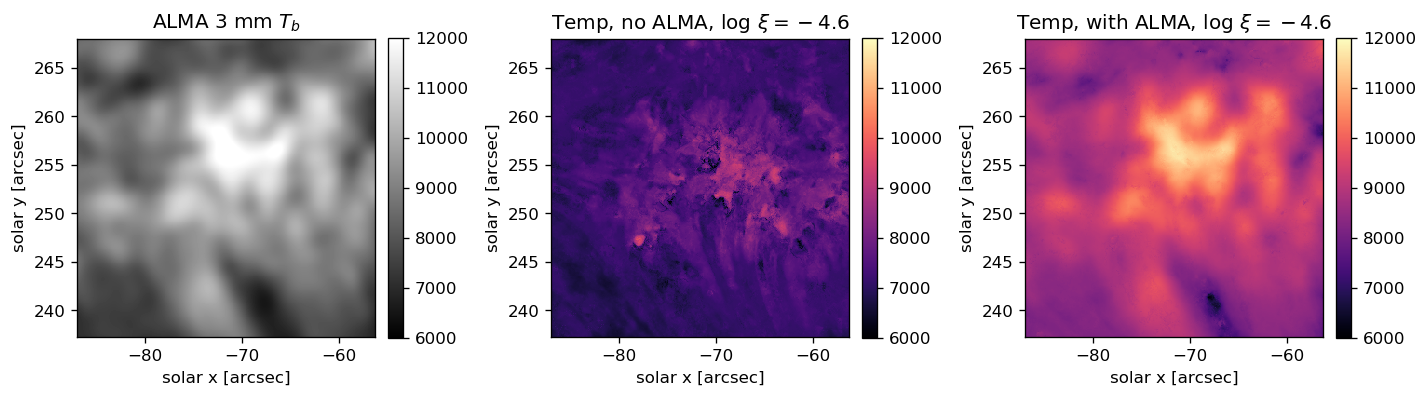

In [19]:
fig,ax = plt.subplots(1,3,figsize=(12,4),facecolor='w')
im00 = ax[0].imshow(obs.dat[0,:,:,-1,0]*7300,extent=[x0,x1,y0,y1],\
               cmap='gist_gray',origin='lower',vmin=6000,vmax=12000)
im01 = ax[1].imshow(mod_nlte.temp[0,:,:,5],extent=[x0,x1,y0,y1],\
               cmap='magma',origin='lower',vmin=6000,vmax=12000)
im11 = ax[2].imshow(mod_alma.temp[0,:,:,5],extent=[x0,x1,y0,y1],\
               cmap='magma',origin='lower',vmin=6000,vmax=12000)
plt.colorbar(im00,ax=ax[0],fraction=0.046,pad=0.04)
plt.colorbar(im01,ax=ax[1],fraction=0.046,pad=0.04)
plt.colorbar(im11,ax=ax[2],fraction=0.046,pad=0.04)
for j in range(3):
    ax[j].set_xlabel('solar x [arcsec]')
    ax[j].set_ylabel('solar y [arcsec]')
ax[0].set_title(r'ALMA 3 mm $T_b$')
ax[1].set_title(r'Temp, no ALMA, $\log\ \xi = -4.6$')
ax[2].set_title(r'Temp, with ALMA, $\log\ \xi = -4.6$')
plt.tight_layout()
plt.savefig('band_3_effects_simple.pdf')

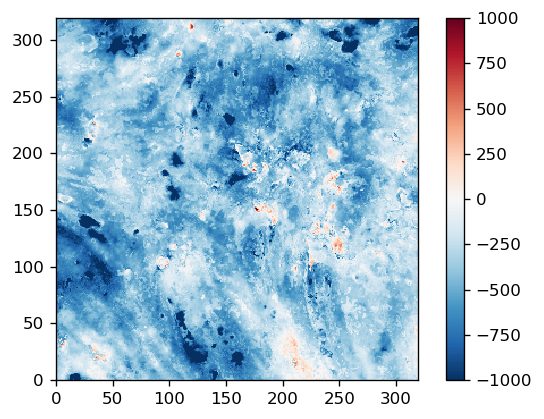

In [20]:
plt.imshow((mod_alma.temp-mod_nlte.temp)[0,:,:,16],cmap='RdBu_r',origin='lower',vmin=-1000,vmax=1000)
plt.colorbar()